<a href="https://colab.research.google.com/github/sang-ichal/SKPI-ITBU-2025/blob/main/SKPI%20ML%20Sesi%2002/SKPI_02_Klasifikasi_Cats_and_Dog_%5Btesting%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYEK KLASIFIKASI GAMBAR CAT AND DOG** - Testing

## **UPLOAD MODEL (TFLite)**

In [3]:
import tensorflow as tf
import numpy as np
from PIL import Image
from google.colab import files
import io
import os
import matplotlib.pyplot as plt

def setup_model_and_classes():
    uploaded = files.upload()
    global interpreter, input_details, output_details, class_names
    tflite_model_path = list(uploaded.keys())[0]
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    class_names = ['Cat','Dog']

setup_model_and_classes()

Saving TFLite.tflite to TFLite.tflite


## **MEBUAT FUNGSI UNTUK PREDIKSI IMAGE**

In [4]:
def predict_image():
    uploaded = files.upload()

    def preprocess_image(image, target_size):
        image = image.resize(target_size)
        image = image.convert('RGB')
        image = np.array(image)
        image = image.astype(np.float32)
        image = image / 255.0
        return np.expand_dims(image, axis=0)

    for filename in uploaded.keys():
        print('Filename: {}'.format(filename))

        image = Image.open(io.BytesIO(uploaded[filename]))

        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        target_size = tuple(input_details[0]['shape'][1:3])
        input_data = preprocess_image(image, target_size)

        interpreter.set_tensor(input_details[0]['index'], input_data)

        interpreter.invoke()

        output_data = interpreter.get_tensor(output_details[0]['index'])
        print("Output :", output_data)
        predicted_class_index = np.argmax(output_data)
        predicted_class_name = class_names[predicted_class_index]
        print("Result :", predicted_class_name)

Saving cats.jpg to cats.jpg
Filename: cats.jpg


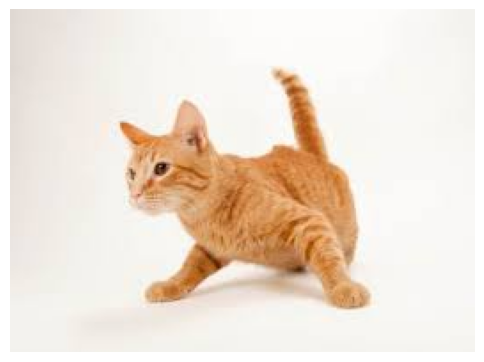

Output : [[0.5639686 0.4360314]]
Result : Cat


In [5]:
predict_image()

Saving dog.jpg to dog.jpg
Filename: dog.jpg


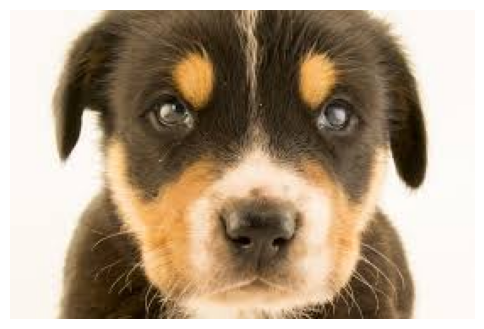

Output : [[0.16482662 0.83517337]]
Result : Dog


In [6]:
predict_image()